<a href="https://colab.research.google.com/github/ashyaulla/Playstore-Data-Analysis/blob/main/Playstore_Data_Analysis(Team_notebook).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##                              **Problem statement**



## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b> 

### **1.Data Preparation and Cleaning**

---


In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from datetime import datetime

In [2]:
#mounting the drive containing the data files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#reading the playstore data ande user reviews data
PS_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone projects/Project 1- Playstore Data Analysis/ PlayStore_Data.csv')
UR_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone projects/Project 1- Playstore Data Analysis/ User_Reviews.csv')


## ***Playstore data***

In [4]:
#To understand the components of the playstore data file
PS_df.info( )


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
#To display the first 5 observations of the data 
PS_df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
# Return the count of duplicates in the Playstore datafarme
PS_df.duplicated().value_counts()


False    10358
True       483
dtype: int64

In [7]:
# Updates the playstore dataframe with duplicate rows removed
PS_df.drop_duplicates(inplace=True)


In [8]:
#To understand the components of the playstore data file and to identify the rows with NaN values
PS_df.info( )


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [9]:
#identifying the app with type NaN
PS_df[PS_df['Type'].isnull()]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [10]:
#After cross-checking in the Goople playstore ,we have identified the app to be of Type='Free'.
PS_df['Type'].fillna("Free", inplace = True)

In [11]:
#identifying the app with Content Rating NaN
print(PS_df[PS_df['Content Rating'].isnull()])
#The value of category column is missing and due to this the values of the other columns are being replaced with the values from previous columns in this row.
set(list(PS_df['Category']))

                                           App Category  ...  Current Ver Android Ver
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9  ...   4.0 and up         NaN

[1 rows x 13 columns]


{'1.9',
 'ART_AND_DESIGN',
 'AUTO_AND_VEHICLES',
 'BEAUTY',
 'BOOKS_AND_REFERENCE',
 'BUSINESS',
 'COMICS',
 'COMMUNICATION',
 'DATING',
 'EDUCATION',
 'ENTERTAINMENT',
 'EVENTS',
 'FAMILY',
 'FINANCE',
 'FOOD_AND_DRINK',
 'GAME',
 'HEALTH_AND_FITNESS',
 'HOUSE_AND_HOME',
 'LIBRARIES_AND_DEMO',
 'LIFESTYLE',
 'MAPS_AND_NAVIGATION',
 'MEDICAL',
 'NEWS_AND_MAGAZINES',
 'PARENTING',
 'PERSONALIZATION',
 'PHOTOGRAPHY',
 'PRODUCTIVITY',
 'SHOPPING',
 'SOCIAL',
 'SPORTS',
 'TOOLS',
 'TRAVEL_AND_LOCAL',
 'VIDEO_PLAYERS',
 'WEATHER'}

In [12]:
#dropping the row for which Content rating has NaN value
PS_df.drop(PS_df[PS_df['Content Rating'].isnull()].index,inplace =True)

In [13]:
#taking mode value of the rating column and replace NaN values in it with the mode value
mode_PS_df_Rating = PS_df['Rating'].mode()
print(mode_PS_df_Rating)

0    4.4
dtype: float64


In [14]:
#Replacing the NaN values of th "Rating" with the mode value
#PS_df['Rating'].fillna(PS_df['Rating'].mode(), inplace = True)
PS_df['Rating'].fillna(value=mode_PS_df_Rating[0], inplace = True)

In [15]:
#DROPPING THE COLUMN OF 'ANDROID VER AND CURRENT VER'
PS_df.drop(['Android Ver', 'Current Ver'] ,  axis=1 , inplace=True)

In [16]:
#check if the playstore dataframe has any null values to ensure that all modifications are in place
PS_df.isnull().sum()


App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
dtype: int64


Firstly, we need to convert the data types with their respective actual type
Reviews, Size, Installs, & Price should have an integer or float datatype, But here we can see of object type, So let's convert them to their respective type.

In [17]:
#Data cleaning for "Reviews column"
PS_df['Reviews'] = PS_df['Reviews'].astype(float)



In [19]:
# Data cleaning for "Size" column
PS_df['Size'] = PS_df.Size.apply(lambda x: x.strip('+'))
PS_df['Size'] = PS_df.Size.apply(lambda x: x.replace(',', ''))
PS_df['Size'] = PS_df.Size.apply(lambda x: x.replace('M', 'e+6'))
PS_df['Size'] = PS_df.Size.apply(lambda x: x.replace('k', 'e+3'))
PS_df['Size'] = PS_df.Size.replace('Varies with device', np.NaN)


In [20]:
PS_df['Size'] = PS_df['Size'].apply(pd.to_numeric)
PS_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10357 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          10357 non-null  float64
 3   Reviews         10357 non-null  float64
 4   Size            8831 non-null   float64
 5   Installs        10357 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10357 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
dtypes: float64(3), object(8)
memory usage: 971.0+ KB


In [21]:
#drops null values in the size column
PS_df.dropna(subset=['Size'], inplace=True)

In [22]:
# Data cleaning for "Installs" column
PS_df['Installs']=PS_df['Installs'].apply(lambda x: x.strip('+'))
PS_df['Installs']=PS_df['Installs'].apply(lambda x: x.replace(',',''))
PS_df['Installs']=PS_df['Installs'].astype(int)


In [23]:
#Data cleaning for "Price" column
PS_df['Price']=PS_df['Price'].apply(lambda x: x.replace('$',''))
PS_df['Price']=PS_df['Price'].astype(float)



In [24]:
#changing datatype of last updated column
PS_df['Last Updated']=PS_df['Last Updated'].apply(lambda x : datetime.strptime(x,"%B %d, %Y"))
PS_df['year']=PS_df['Last Updated'].apply(lambda x :x.year)

In [25]:
#checking the datatypes of each column
PS_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8831 entries, 0 to 10840
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             8831 non-null   object        
 1   Category        8831 non-null   object        
 2   Rating          8831 non-null   float64       
 3   Reviews         8831 non-null   float64       
 4   Size            8831 non-null   float64       
 5   Installs        8831 non-null   int64         
 6   Type            8831 non-null   object        
 7   Price           8831 non-null   float64       
 8   Content Rating  8831 non-null   object        
 9   Genres          8831 non-null   object        
 10  Last Updated    8831 non-null   datetime64[ns]
 11  year            8831 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(5)
memory usage: 896.9+ KB


## ***User review data***


In [26]:
UR_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [27]:
UR_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [28]:
#Eliminating observations with the same translated_review
UR_df = UR_df.drop_duplicates(['Translated_Review'])

In [29]:
#checking for null values
UR_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27995 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     27995 non-null  object 
 1   Translated_Review       27994 non-null  object 
 2   Sentiment               27994 non-null  object 
 3   Sentiment_Polarity      27994 non-null  float64
 4   Sentiment_Subjectivity  27994 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.3+ MB


In [30]:
#Eliminating the existing null value(s) from the dataset
UR_df.dropna(subset = ['Translated_Review'], inplace=True)

UR_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 27994 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     27994 non-null  object 
 1   Translated_Review       27994 non-null  object 
 2   Sentiment               27994 non-null  object 
 3   Sentiment_Polarity      27994 non-null  float64
 4   Sentiment_Subjectivity  27994 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.3+ MB


In [31]:
#dropping the columns named sentiment polarity and sunjectivity
UR_df.drop(['Sentiment_Polarity', 'Sentiment_Subjectivity'],axis=1,inplace=True)


In [32]:
UR_df.head()

,App,Translated_Review,Sentiment
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive
3,10 Best Foods for You,Works great especially going grocery store,Positive
4,10 Best Foods for You,Best idea us,Positive
5,10 Best Foods for You,Best way,Positive


# ***Analysis and Visualization of data***

In [33]:
#please mention the question numbers of questions you'd like to work on(select 2 each)
# Manish -1,
# Adarsh -
# Ashu -3,4,5
# Radhika-6,8


In [ ]:
#category



1.   Top categories which contains the highest number of apps 
2.   Rating vs Category
1.   No:of free vs paid apps
3.   Rating of free vs paid apps
4.   Content rating vs No: of apps
5.   Rating vs installs
6.   Size vs Installs,last updated,category
7.   Top rated apps in each category-Their versions,last updated,android   version,installs,size(i think version does not play a viltal role(ASHU))
8.   Worst rated apps -Their versions,last updated,android version,installs,size
9.   Rating vs sentiment of review comments 
10.  Top 10 Genres of apps in Playstore
1.   List item
2.   List item











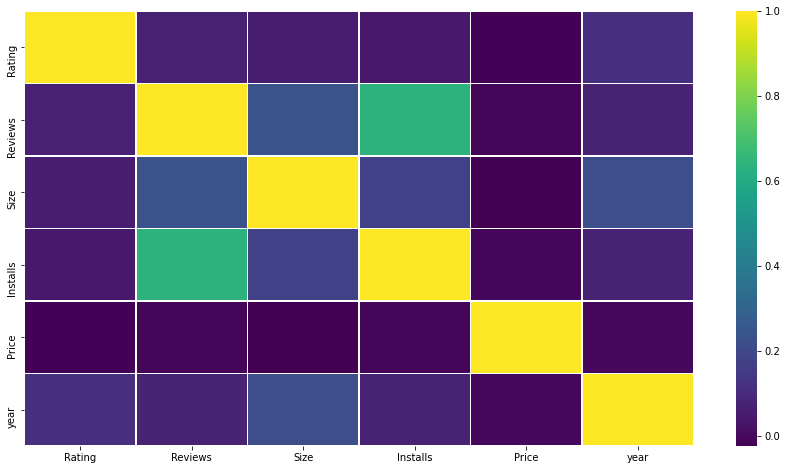

In [38]:
#Correlation heatmap
plt.figure(figsize = (15,8))
sns.heatmap(PS_df.corr(),linewidth=0.5,cmap='viridis' )

In [ ]:
#Question1


In [39]:
y=PS_df['Category'].value_counts().index
x=PS_df['Category'].value_counts()
xsis=[]
ysis=[]
for i in range(len(x)):
  xsis.append(x[i])
  ysis.append(y[i])
  

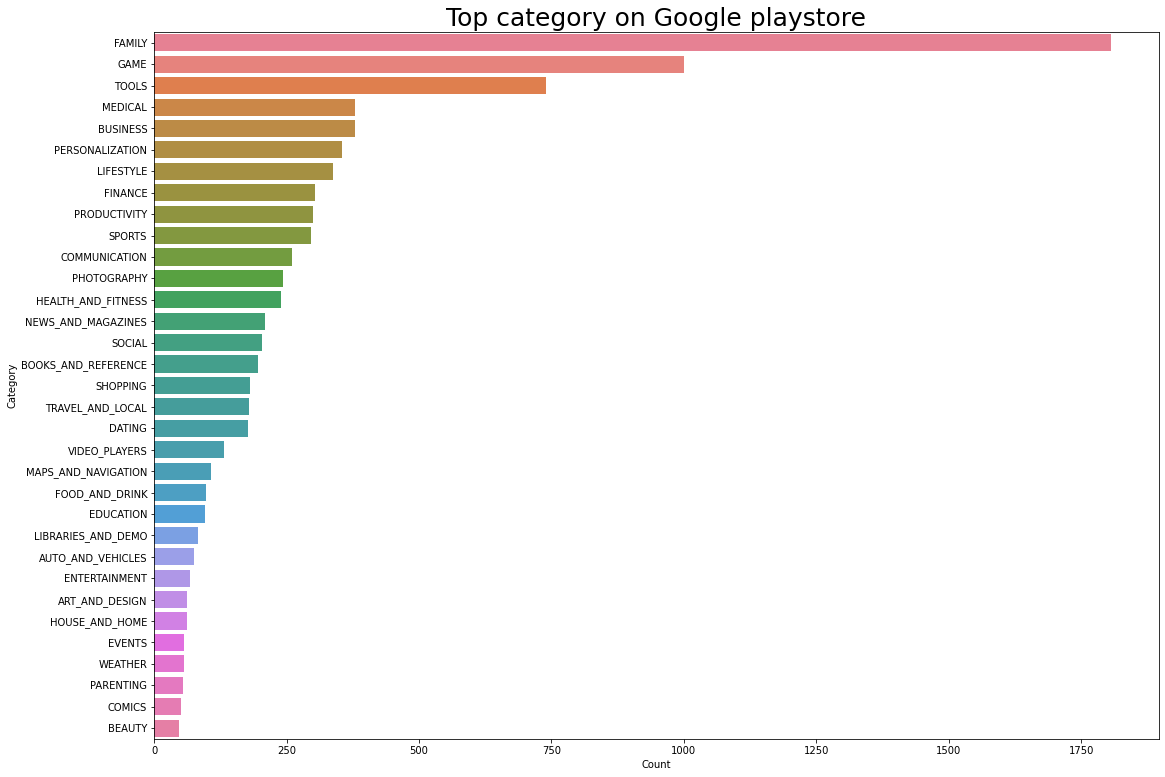

In [40]:
plt.figure(figsize=(18,13))
plt.xlabel('Count')
plt.ylabel('Category')

graph=sns.barplot(x=xsis,y=ysis,palette="husl")
graph.set_title("Top category on Google playstore",fontsize=25);

# Rating vs installs
## Question 2

Text(0, 0.5, 'Installs')

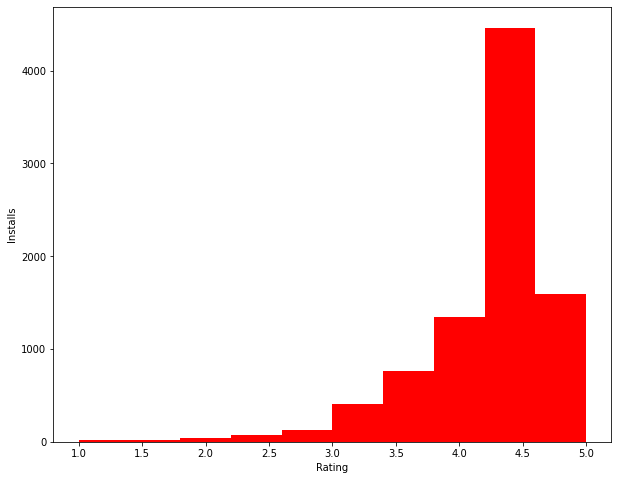

In [41]:
plt.figure(figsize=(10,8))
Installs = PS_df[~PS_df['Rating'].isna()]['Rating']
plt.hist(Installs.values, color='red')
plt.xlabel('Rating')
plt.ylabel('Installs')


# The above figure show that the high rated apps getting massive amount of installions whe compared with low rated apps 

# 3.   Number of free vs paid apps
## question 3

In [42]:
x2 = PS_df['Type'].value_counts().index
y2 = PS_df['Type'].value_counts()

x2sis = []
y2sis = []
for Type in range(len(x2)):
    x2sis.append(x2[Type])
    y2sis.append(y2[Type])


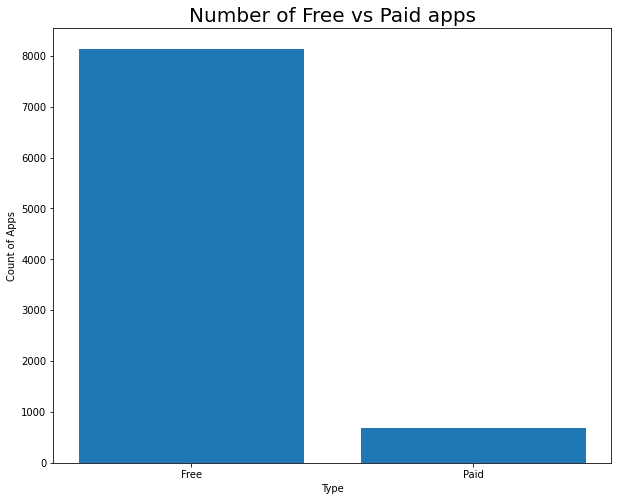

In [43]:
plt.figure(figsize=(10,8))
plt.bar(x2sis,y2sis );
plt.title('Number of Free vs Paid apps',size=20)
plt.ylabel('Count of Apps');
plt.xlabel('Type');

# The number of free Apps are very high when compared to Paid Apps. The crowd is often tends to use Free Apps when compared to Paid Apps

In [44]:
x2 = PS_df['Content Rating'].value_counts().index
y2 = PS_df['Content Rating'].value_counts()

x2sis = []
y2sis = []
for Content_Rating in range(len(x2)):
    x2sis.append(x2[Content_Rating])
    y2sis.append(y2[Content_Rating])


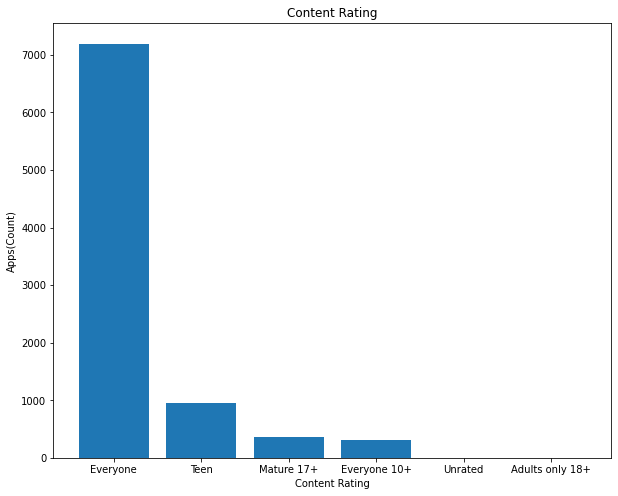

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(x2sis,y2sis);
plt.title('Content Rating');
plt.ylabel('Apps(Count)');
plt.xlabel('Content Rating');

# In previos fig Rating category we already observed that the least rated Apps has low installation as here i the above fig we can see that "Adults only 18+" Content Rating Apps also has low amount of instalation i.e. almost none whereas the Content Rating "Everyone" has high no. of installation followed to the Content Rating "Teen". and the Content Rating labelled as "Mature 17+" and "Everyone 10+" has quite equal amount of installations


# Rating vs Category
## Question 2


ValueError: ignored

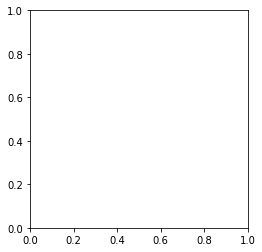

In [ ]:
plt.pie('Category')
plt.show()

In [ ]:
PS_df.head()
UR_df.info()

##Rating vs sentiment of review comments 


# **Rating distribution of apps**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


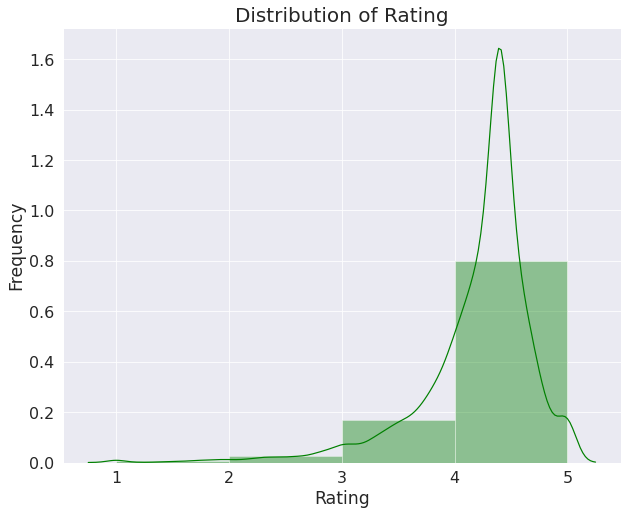

In [ ]:
#Rating distribution of apps

plt.figure(figsize=(10,8))
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.title('Distribution of Rating',size = 20);
sns.set_style('darkgrid')
sns.set_context('paper',font_scale=1.8)
sns.distplot(PS_df['Rating'],bins=4,color='green')

From the distribution plot,it can be inferred that the most of the apps in Playstore have a rating in the range 4 to 5

# **Top 10 Genres of apps in Playstore**





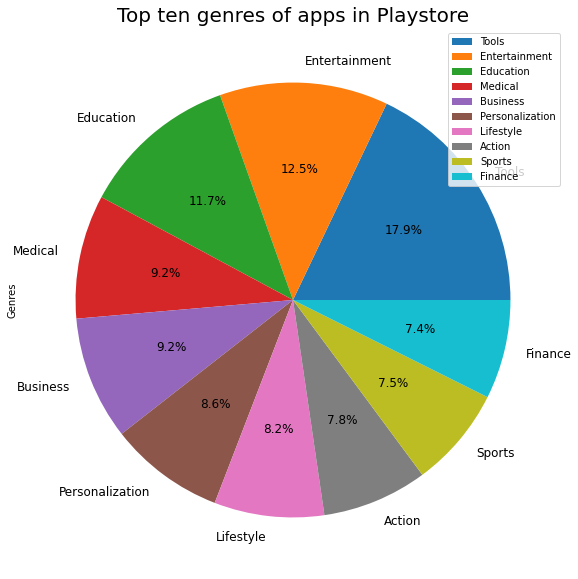

In [49]:
#top 10 genres of apps in playstore
genres = PS_df['Genres'].value_counts().head(10)
plt.figure(figsize=(15,10))
genres.plot(kind='pie',y='GENRES',autopct='%1.1f%%',fontsize=12)
plt.legend()
plt.title("Top ten genres of apps in Playstore",size=20)
plt.show()

Greater number of apps belong to the genres:Tools,Communication and Education.

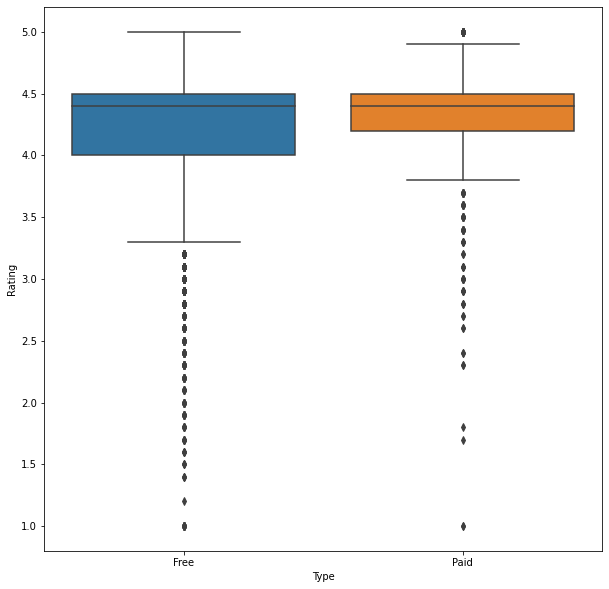

In [50]:
#Rating of free vs paid apps

plt.figure(figsize=(10,10))
sns.boxplot(x='Type',y='Rating',data=PS_df)

From the above whisker plot,it can be understood that paid apps tend to have higher ratings than free apps.This could be due to the availabity of better features in the paid apps as compared to free apps.

In [51]:
df=(PS_df.groupby(['year','Category'])['Installs'].sum().reset_index()).sort_values('Installs',ascending=False)
year_list=list(set(df.year))
max_installs=pd.DataFrame()
sub_df={}
installs_per_year=[]
i=0
for year_ in year_list:
    sub_df.update(dict(df[df['year']==year_].iloc[0,:]))
    max_installs=max_installs.append(sub_df,ignore_index=True)
    

In [ ]:
max_installs.sort_values('year',ascending=True,inplace=True)
max_installs

,Category,Installs,year
3,FAMILY,1.000000e+05,2010.0
4,GAME,1.010000e+07,2011.0
5,LIBRARIES_AND_DEMO,1.000000e+07,2012.0
6,FAMILY,5.018831e+07,2013.0
7,PERSONALIZATION,7.259100e+07,2014.0
8,GAME,1.930985e+08,2015.0
0,GAME,3.231697e+08,2016.0
1,FAMILY,8.274036e+08,2017.0
2,GAME,2.543473e+10,2018.0


App categories that have got the most downloads by each year are tabulated above.We can see that apps belonging to family category were mostly installed during 2010 and by 2018,games have taken up their position to become the app category with most downloads.The number of installs of apps in general have also increase exponentially during the span of years.This is due to the increase in accessibility to smartphones.

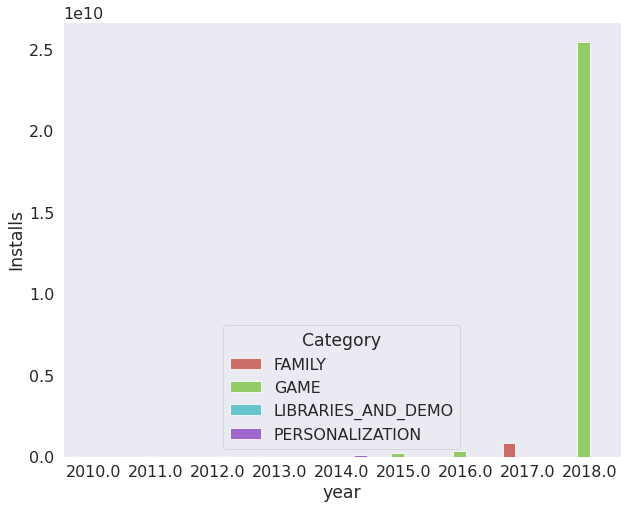

In [ ]:
sns.set_style('dark')
plt.figure(figsize=(10,8))

sns.barplot(x='year',y='Installs',hue='Category',data=max_installs,palette='hls')